In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


dataset_path = "/kaggle/input/70-dog-breedsimage-data-set"


train_dir = dataset_path + "/train"
valid_dir = dataset_path + "/valid"
test_dir = dataset_path + "/test"


print("📁 Available folders in dataset path:", os.listdir(dataset_path))
print(f"📂 Train: {len(os.listdir(train_dir))} folders")
print(f"📂 Valid: {len(os.listdir(valid_dir))} folders")
print(f"📂 Test: {len(os.listdir(test_dir))} folders")

📁 Available folders in dataset path: ['valid', 'dogs.csv', 'test', 'train']
📂 Train: 70 folders
📂 Valid: 70 folders
📂 Test: 70 folders


In [2]:
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical'
)
valid_gen = datagen.flow_from_directory(
    valid_dir, target_size=(224, 224), batch_size=32, class_mode='categorical'
)
test_gen = datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical'
)

Found 7946 images belonging to 70 classes.
Found 700 images belonging to 70 classes.
Found 700 images belonging to 70 classes.


**BASIC  CNN MODEL**

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**MODEL 2**

In [4]:
vgg_model = models.Sequential([
    
    layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),


    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_gen.num_classes, activation='softmax')
])


**MODEL 3**

In [5]:
resnet_seq_model = models.Sequential([
    layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(224,224,3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_gen.num_classes, activation='softmax')
])


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

from tensorflow.keras.optimizers import Adam

vgg_model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy',metrics=['accuracy'])
vgg_model.summary()

resnet_seq_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_seq_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 70)                  │          17,990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,801,606 (98.43 MB)

 Trainable params: 25,801,606 (98.43 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │     102,760,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 70)                  │          35,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 103,944,070 (396.52 MB)

 Trainable params: 103,943,174 (396.51 MB)

 Non-trainable params: 896 (3.50 KB)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │              

 Total params: 1,316,486 (5.02 MB)

 Trainable params: 1,314,694 (5.02 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [7]:
EPOCHS = 15
history = model.fit(train_gen, validation_data=valid_gen, epochs=EPOCHS)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


249/249 ━━━━━━━━━━━━━━━━━━━━ 54s 175ms/step - accuracy: 0.0182 - loss: 4.4714 - val_accuracy: 0.0329 - val_loss: 4.1147
Epoch 2/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.0464 - loss: 4.0544 - val_accuracy: 0.0914 - val_loss: 3.7728
Epoch 3/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.0956 - loss: 3.7141 - val_accuracy: 0.1700 - val_loss: 3.3690
Epoch 4/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.2012 - loss: 3.1639 - val_accuracy: 0.2286 - val_loss: 3.0768
Epoch 5/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.3496 - loss: 2.4778 - val_accuracy: 0.2800 - val_loss: 2.9624
Epoch 6/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - accuracy: 0.5316 - loss: 1.6885 - val_accuracy: 0.2586 - val_loss: 3.1396
Epoch 7/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.6623 - loss: 1.2145 - val_accuracy: 0.3129 - val_loss: 3.2695
Epoch 8/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.7436 - loss: 0.8930 - val_accura

In [8]:
EPOCHS = 15
history_vgg = vgg_model.fit(train_gen, validation_data=valid_gen, epochs=EPOCHS)

Epoch 1/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 181s 568ms/step - accuracy: 0.0213 - loss: 5.5409 - val_accuracy: 0.0157 - val_loss: 17.8063
Epoch 2/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 99s 395ms/step - accuracy: 0.0301 - loss: 4.2391 - val_accuracy: 0.0171 - val_loss: 6.6426
Epoch 3/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 100s 398ms/step - accuracy: 0.0292 - loss: 4.2285 - val_accuracy: 0.0243 - val_loss: 4.2897
Epoch 4/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 100s 399ms/step - accuracy: 0.0360 - loss: 4.1917 - val_accuracy: 0.0343 - val_loss: 4.1763
Epoch 5/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 98s 394ms/step - accuracy: 0.0519 - loss: 4.1412 - val_accuracy: 0.0386 - val_loss: 4.1582
Epoch 6/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 99s 396ms/step - accuracy: 0.0487 - loss: 4.1049 - val_accuracy: 0.0557 - val_loss: 4.2342
Epoch 7/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 99s 397ms/step - accuracy: 0.0605 - loss: 4.0204 - val_accuracy: 0.0743 - val_loss: 4.1317
Epoch 8/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 99s 395ms/step - accuracy: 0.0700 - los

In [9]:
EPOCHS = 15
history_resnet = resnet_seq_model.fit(train_gen, validation_data=valid_gen, epochs=EPOCHS)

Epoch 1/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 110s 410ms/step - accuracy: 0.0397 - loss: 4.2130 - val_accuracy: 0.0143 - val_loss: 5.4137
Epoch 2/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 96s 384ms/step - accuracy: 0.0697 - loss: 3.9070 - val_accuracy: 0.0271 - val_loss: 5.6357
Epoch 3/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 96s 384ms/step - accuracy: 0.1047 - loss: 3.6795 - val_accuracy: 0.0743 - val_loss: 4.0344
Epoch 4/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 96s 386ms/step - accuracy: 0.1364 - loss: 3.4441 - val_accuracy: 0.1100 - val_loss: 3.8327
Epoch 5/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 97s 386ms/step - accuracy: 0.1821 - loss: 3.1839 - val_accuracy: 0.1129 - val_loss: 3.9394
Epoch 6/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 97s 386ms/step - accuracy: 0.2061 - loss: 3.0376 - val_accuracy: 0.1743 - val_loss: 3.3210
Epoch 7/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 96s 383ms/step - accuracy: 0.2400 - loss: 2.8857 - val_accuracy: 0.1886 - val_loss: 3.3835
Epoch 8/15
249/249 ━━━━━━━━━━━━━━━━━━━━ 96s 385ms/step - accuracy: 0.2753 - loss: 

In [10]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"✅ Test Accuracy: {test_acc * 100:.2f}%")

model.save("dog_breed_classifier.h5")

22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step - accuracy: 0.2940 - loss: 4.2996
✅ Test Accuracy: 29.57%


In [11]:
test_loss_vgg, test_acc_vgg = vgg_model.evaluate(test_gen)
print(f"✅ VGG Model Test Accuracy: {test_acc_vgg * 100:.2f}%")

vgg_model.save("vgg_dog_breed_classifier.h5")


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.0939 - loss: 3.9033
✅ VGG Model Test Accuracy: 9.57%


In [12]:
test_loss_resnet, test_acc_resnet = resnet_seq_model.evaluate(test_gen)
print(f"✅ ResNet Model Test Accuracy: {test_acc_resnet * 100:.2f}%")

resnet_seq_model.save("resnet_dog_breed_classifier.h5")


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.4747 - loss: 1.7617
✅ ResNet Model Test Accuracy: 49.43%


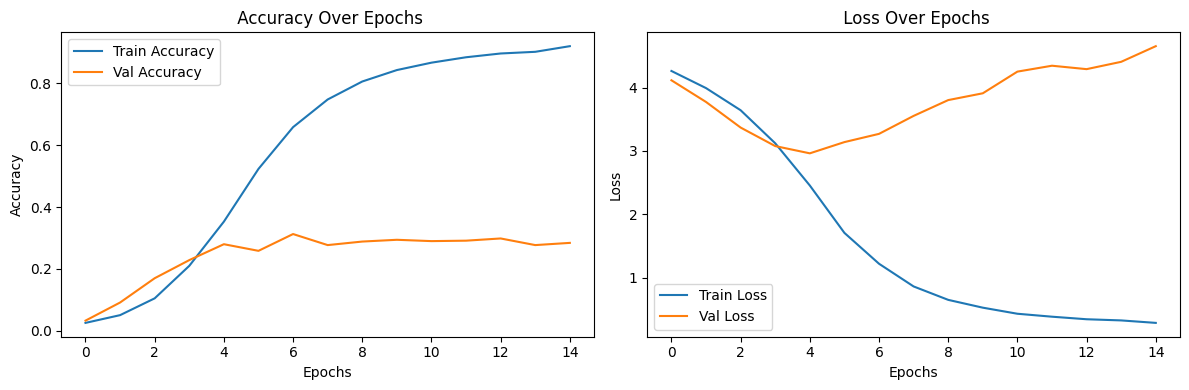

In [13]:
 import matplotlib.pyplot as plt


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')#blue
plt.plot(history.history['val_accuracy'], label='Val Accuracy')#org
plt.title(' Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title(' Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


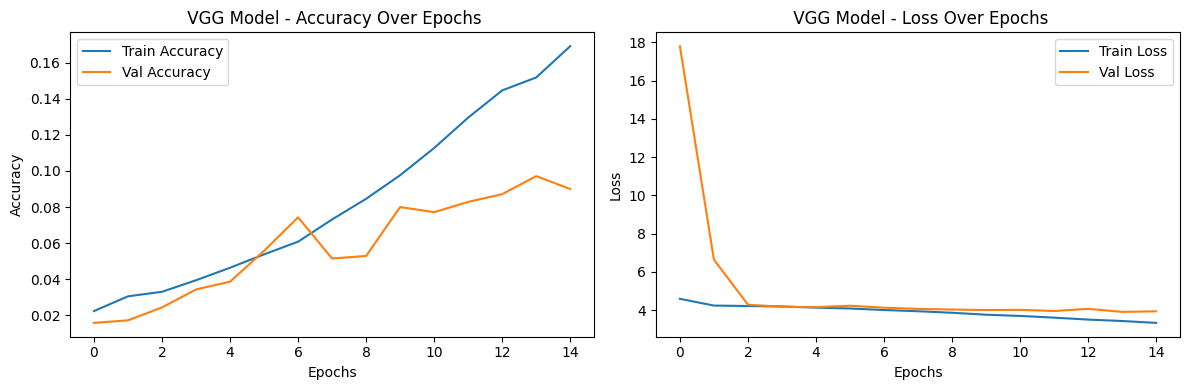

In [14]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Val Accuracy')
plt.title(' VGG Model - Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'], label='Train Loss')
plt.plot(history_vgg.history['val_loss'], label='Val Loss')
plt.title(' VGG Model - Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


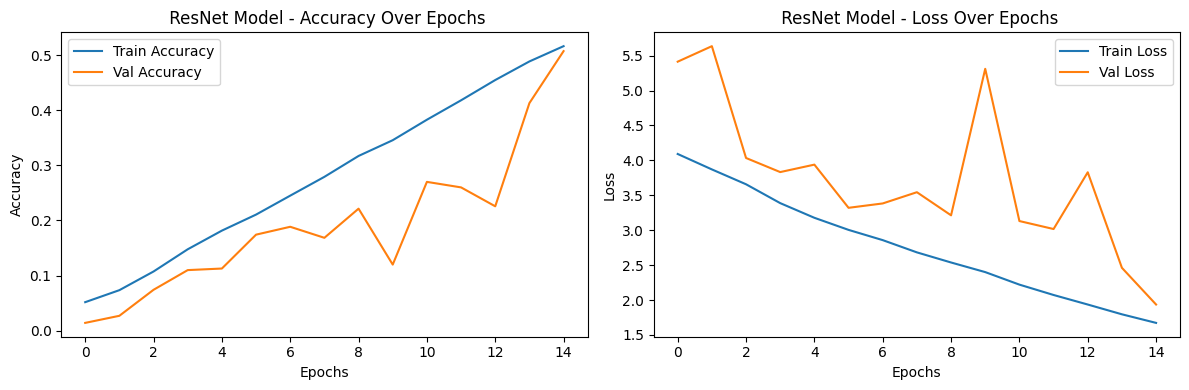

In [15]:

plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Val Accuracy')
plt.title(' ResNet Model - Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='Train Loss')
plt.plot(history_resnet.history['val_loss'], label='Val Loss')
plt.title(' ResNet Model - Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [16]:
import matplotlib.pyplot as plt

basic model predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


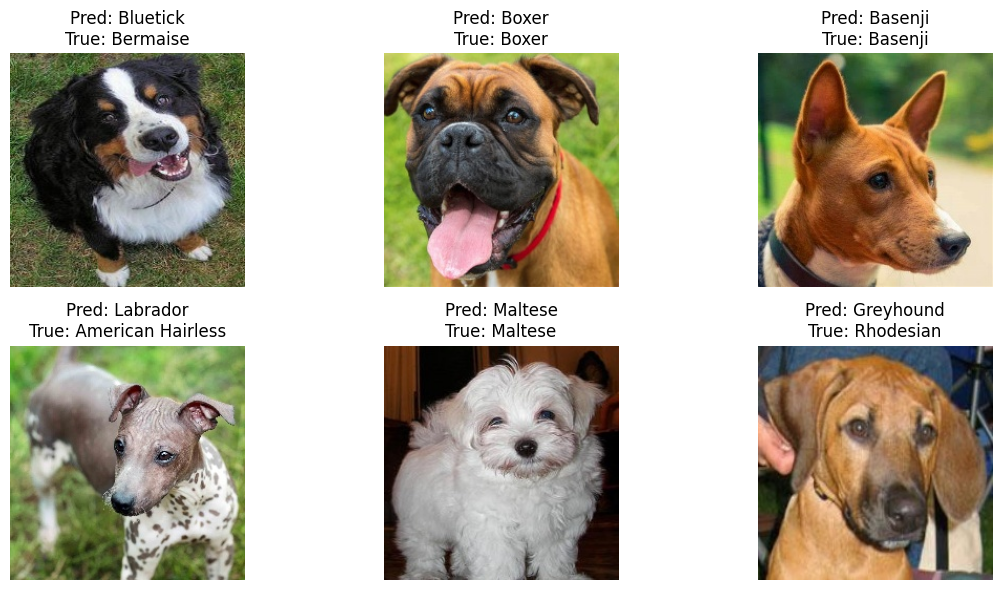

In [29]:
import numpy as np


class_labels = list(train_gen.class_indices.keys())


test_images, test_labels = next(test_gen)
preds = model.predict(test_images)
pred_labels = np.argmax(preds, axis=1)
true_labels = np.argmax(test_labels, axis=1)


plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(test_images[i])
    plt.axis('off')
    plt.title(f"Pred: {class_labels[pred_labels[i]]}\nTrue: {class_labels[true_labels[i]]}")
plt.tight_layout()
plt.show()


model 2 predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


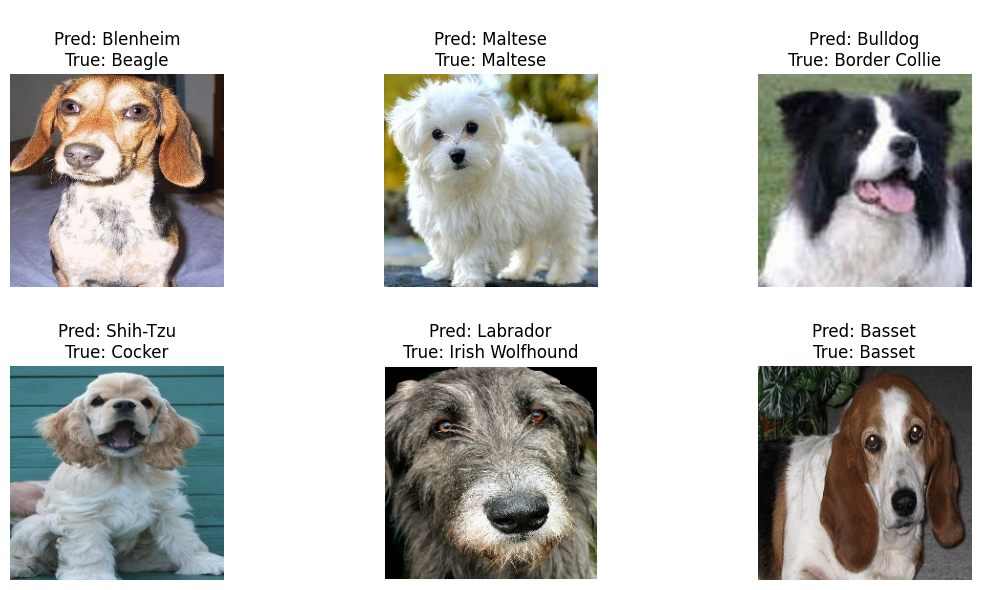

In [24]:
import numpy as np
import matplotlib.pyplot as plt


class_labels = list(train_gen.class_indices.keys())


test_images, test_labels = next(test_gen)
preds_vgg = vgg_model.predict(test_images)
pred_labels_vgg = np.argmax(preds_vgg, axis=1)
true_labels = np.argmax(test_labels, axis=1)



plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(test_images[i])
    plt.axis('off')
    plt.title(f"\nPred: {class_labels[pred_labels_vgg[i]]}\nTrue: {class_labels[true_labels[i]]}")
plt.tight_layout()
plt.show()


model 3 predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


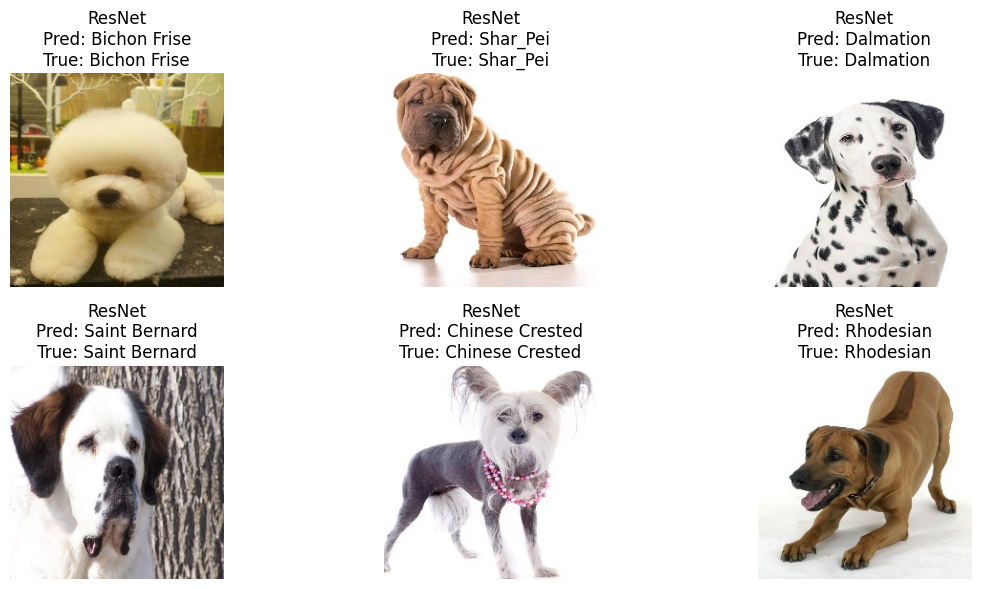

In [23]:


preds_resnet = resnet_seq_model.predict(test_images)
pred_labels_resnet = np.argmax(preds_resnet, axis=1)



plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(test_images[i])
    plt.axis('off')
    plt.title(f"ResNet\nPred: {class_labels[pred_labels_resnet[i]]}\nTrue: {class_labels[true_labels[i]]}")
plt.tight_layout()
plt.show()
